# HITANSH AGARWAL

# 230957218

## Week 3

### Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Mean Age: 33.240885416666664
Standard Deviation of Age: 11.76023154067868


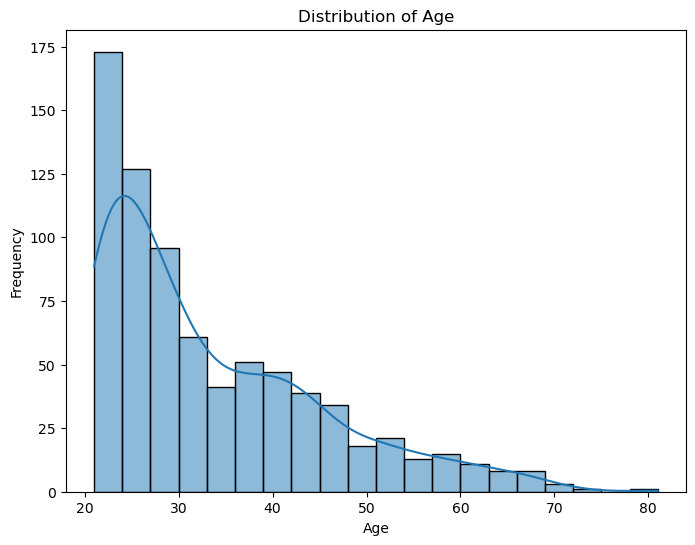

In [3]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()
print(f"Mean Age: {age_mean}\nStandard Deviation of Age: {age_std}")

plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

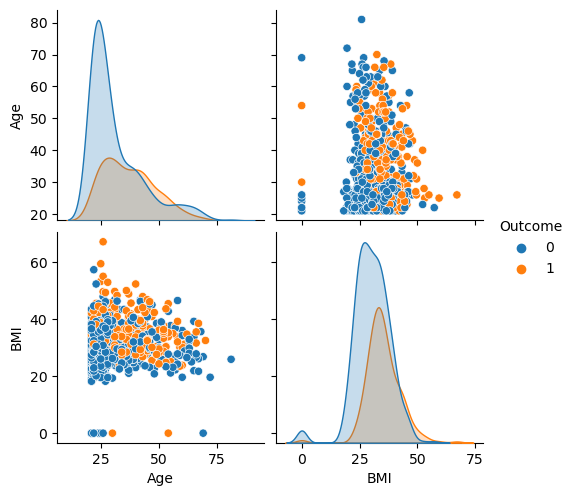

In [4]:
age_bmi_class = df.groupby('Outcome')[['Age', 'BMI']].agg('mean', 'std')
age_bmi_class

sns.pairplot(df, vars = ['Age', 'BMI'], hue = 'Outcome')
plt.show()

In [5]:
class_distribution = df['Outcome'].value_counts()
class_distribution

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

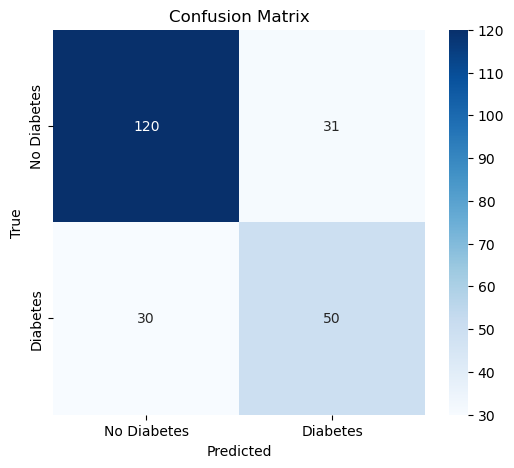

In [7]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
accuracy = accuracy_score(y_test, y_pred)
true_positive_score = recall_score(y_test, y_pred)
true_negative_score = recall_score(y_test, y_pred, pos_label = 0)
print(f"Accuracy: {accuracy}\nTrue Positive Score: {true_positive_score}\nTrue Negative Score: {true_negative_score}")

Accuracy: 0.7359307359307359
True Positive Score: 0.625
True Negative Score: 0.7947019867549668


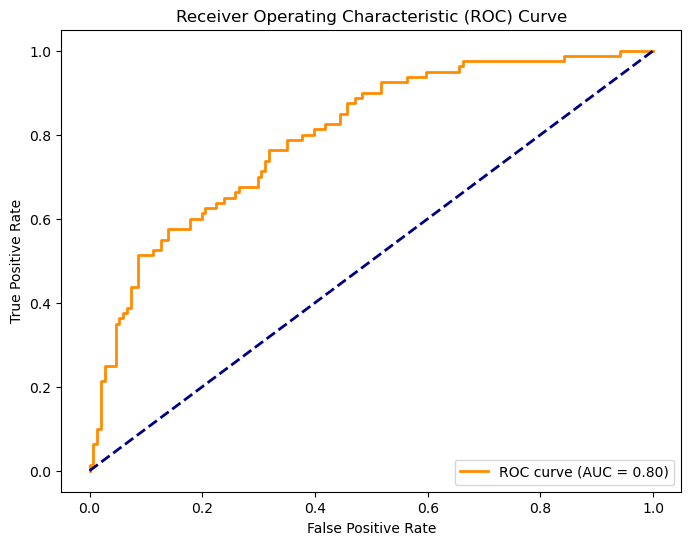

In [9]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Exercise 2

In [10]:
df = pd.read_csv('Iris.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


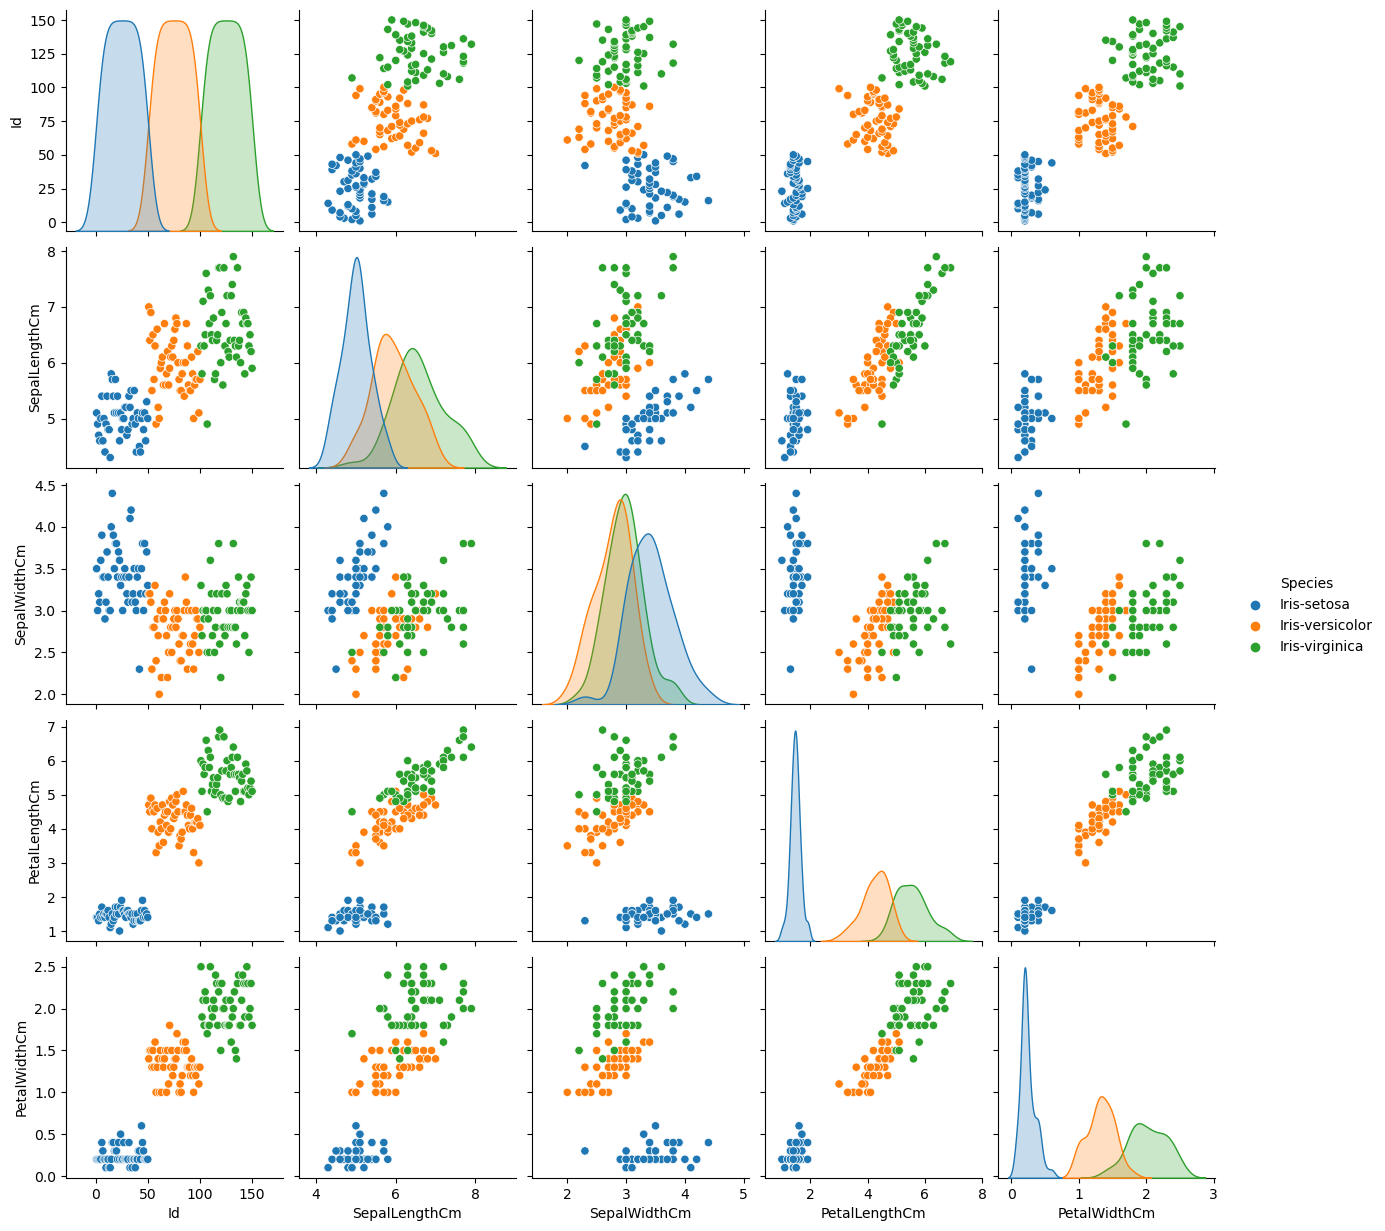

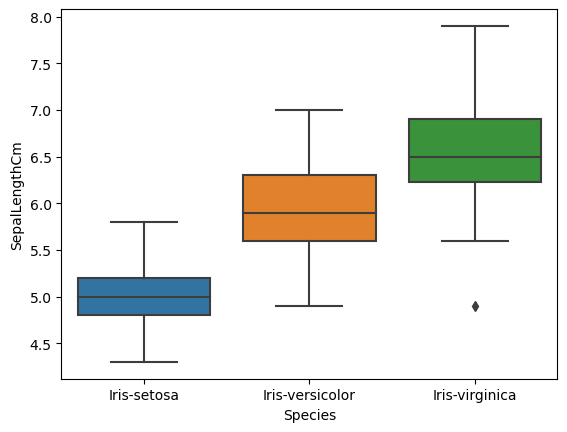

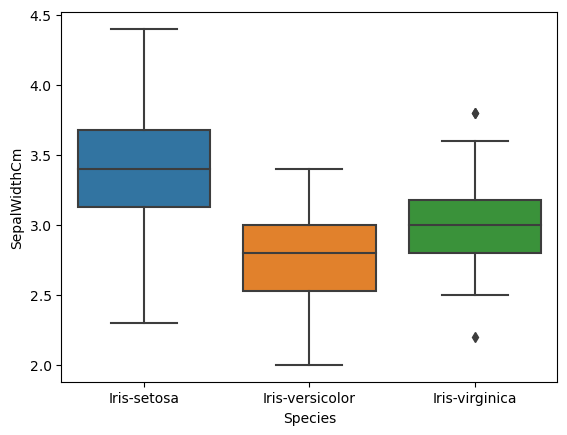

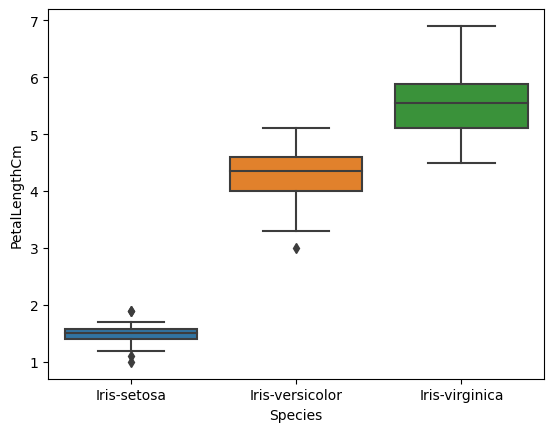

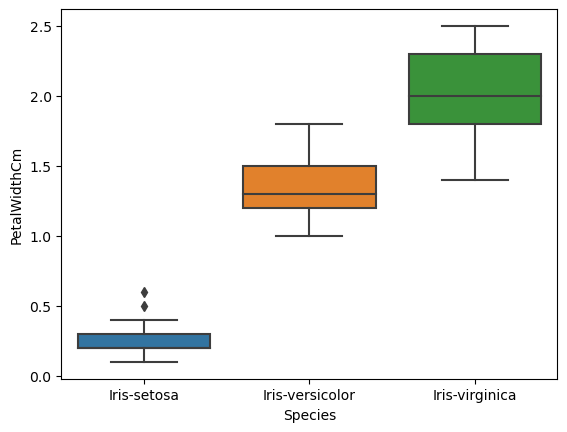

In [11]:
sns.pairplot(df, hue = 'Species')
plt.show()

sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)
plt.show()

sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)
plt.show()

sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)
plt.show()

sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)
plt.show()

In [12]:
x = df.drop('Species', axis = 1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 73)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

log_reg_model = LogisticRegression(max_iter = 200)
log_reg_model.fit(x_train, y_train)

y_pred_log_reg = log_reg_model.predict(x_test)

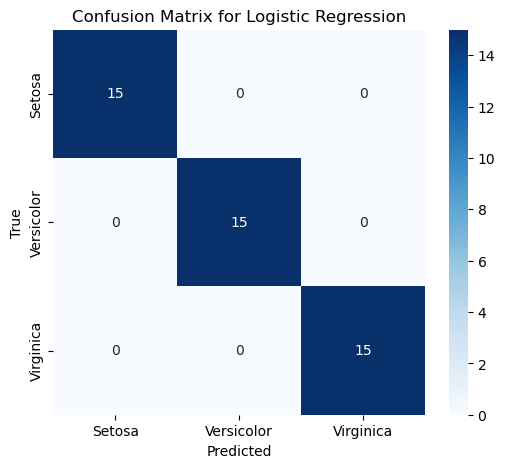

Accuracy of Logistic Regression: 1.0


In [13]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Accuracy of Logistic Regression: {accuracy_log_reg}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

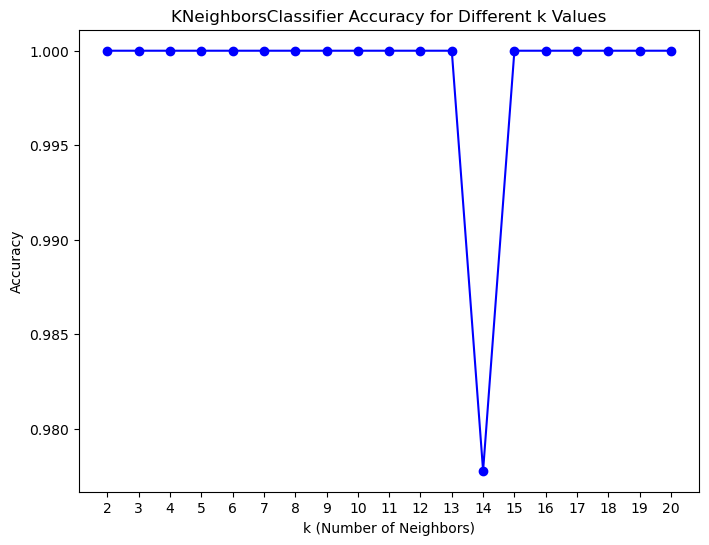

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(2, 21))
accuracy_knn = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred_knn = knn_model.predict(x_test)
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_knn, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNeighborsClassifier Accuracy for Different k Values')
plt.xticks(np.arange(2, 21, 1))
plt.show()

In [15]:
best_k = k_values[np.argmax(accuracy_knn)]
best_accuracy = max(accuracy_knn)

print(f"The best k is {best_k} with an accuracy of {best_accuracy:.4f}")

The best k is 2 with an accuracy of 1.0000


In [16]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(x_train, y_train)
y_pred_knn_best = best_knn_model.predict(x_test)

cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

print(f'Accuracy of Logistic Regression: {accuracy_log_reg}')
print(f'Accuracy of KNeighborsClassifier (Best k={best_k}): {accuracy_knn_best}')

Accuracy of Logistic Regression: 1.0
Accuracy of KNeighborsClassifier (Best k=2): 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
